# Expansión Térmica del Material (Nitinol)

El objetivo de la función es calcular la expansión del material (como el Nitinol) en función de la temperatura, teniendo en cuenta el cambio de fase entre **martensita** y **austenita**.

## Fórmulas utilizadas

### 1. Expansión Térmica en Martensita (Antes de $A_s$):

La fórmula básica de expansión térmica es:

$$
D(T) = D_{\text{inicial}} \times (1 + \alpha_m \times \Delta T)
$$

- $D_{\text{inicial}}$: El diámetro inicial o longitud del material a temperatura baja ($T_{\text{min}}$).
- $\alpha_m$: Coeficiente de expansión térmica en martensita.
- $\Delta T$: Diferencia de temperatura ($T - T_{\text{min}}$).

**¿Qué significa?**
En este caso, cuando la temperatura es menor que la temperatura de inicio de transformación $A_s$, el material sigue siendo completamente martensita. Aquí, la expansión es lineal y solo depende de la temperatura.

### 2. Expansión Térmica en la Transición de Fase (Entre $A_s$ y $A_f$):

En este rango de temperaturas, el material está en transición entre martensita y austenita. Aquí utilizamos una **curva de transformación** que depende de cómo varía la fase entre $A_s$ y $A_f$:

$$
\text{fracción transformada} = \frac{1}{2} \times \left(1 - \cos \left( \pi \times f \right)\right)
$$

donde:

$$
f = \frac{T - A_s}{A_f - A_s}
$$

- $f$: Fracción de la transformación de fase, que varía de 0 (todo martensita) a 1 (todo austenita).
- $\text{fracción transformada}$: Cómo cambia el volumen del material a medida que pasa de martensita a austenita.

El término de expansión térmica se calcula como:

$$
\text{expansión térmica} = (1 + \alpha_m \times \Delta T_1) \times (1 + \alpha_a \times \Delta T_2)
$$

donde:
- $\Delta T_1$: Diferencia de temperatura entre $T_{\text{min}}$ y $A_s$.
- $\Delta T_2$: Diferencia de temperatura entre $A_s$ y $T$.
- $\alpha_a$: Coeficiente de expansión térmica en la fase austenita.

**¿Qué significa?**
En este intervalo de temperaturas, la expansión térmica no es solo una función de la temperatura, sino que también depende de cuánto se ha transformado el material de martensita a austenita. A medida que más material se convierte en austenita, su expansión será mayor debido a su mayor coeficiente de expansión térmica.

### 3. Expansión Térmica en Austenita Completa (Después de $A_f$):

Cuando la temperatura supera $A_f$, todo el material ha cambiado a austenita. La expansión térmica es completamente determinada por el coeficiente de expansión térmica $\alpha_a$ de la fase austenita:

$$
D(T) = D_{\text{inicial}} \times (1 + \alpha_m \times \Delta T_1) \times (1 + \alpha_a \times \Delta T_2) \times (1 + 1)
$$

Aquí, la fracción transformada es igual a 1 (es decir, el material es completamente austenita).

**¿Qué significa?**
Una vez que el material ha alcanzado el 100% de austenita, la expansión térmica se comporta como si fuera un material homogéneo con coeficiente de expansión $\alpha_a$, y el material sigue expandiéndose a medida que sube la temperatura.

## Cálculo Final:

Para cada temperatura $T$ entre $T_{\text{min}}$ y $T_{\text{max}}$, calculamos el valor de $D(T)$, que nos da el diámetro (o longitud) del material en función de la temperatura.

- **Antes de $A_s$**: Solo depende de $\alpha_m$.
- **Entre $A_s$ y $A_f$**: Depende de la fase martensita y de la fracción transformada.
- **Después de $A_f$**: Solo depende de $\alpha_a$, y el material está completamente transformado en austenita.

## Visualización y Resultados:

Una vez que se calcula $D(T)$ para todo el rango de temperaturas, mostramos un gráfico de la expansión térmica. En este gráfico:
- La línea **roja** indica la temperatura de $37^\circ$C, para mostrar el valor de $D$ a esa temperatura.
- La **zona sombreada** en gris muestra el rango de transición de fase, donde el material cambia de martensita a austenita.
- Los gráficos de **diámetro** y **longitud** se visualizan con líneas de colores diferentes (azul para diámetro y verde para longitud), permitiendo comparar cómo se comporta el material en función de la temperatura.

## ¿Qué pasa en el gráfico?
- En el gráfico, puedes observar cómo el material se expande y cómo el cambio de fase afecta la expansión térmica. 
- En temperaturas menores a $A_s$, el material sigue siendo martensita y su expansión es menor.
- Al entrar en el rango de transición de fase (entre $A_s$ y $A_f$), la expansión aumenta debido a la mezcla de fases martensita y austenita.
- Después de $A_f$, el material está completamente austenita, y su expansión térmica sigue un comportamiento más homogéneo y predecible.

## Resumen de lo que hace el código:
1. Calcula la expansión térmica en función de la temperatura y las transiciones de fase.
2. Muestra el gráfico con las líneas correspondientes y resalta la zona de transición de fase.
3. Permite observar cómo varía el diámetro o la longitud del material con la temperatura.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Función general
def expansion(tipo, T_min, T_max, D_inicial, As, Af, alpha_m, alpha_a):
    
    T = np.linspace(T_min, T_max, 500)
    D = np.zeros_like(T)

    for i, temp in enumerate(T):
        if temp < As:
            delta_T = temp - T_min
            # Expansión en martensita
            D[i] = D_inicial * (1 + alpha_m * delta_T)
        elif As <= temp <= Af:
            # En la transición de fase
            f = (temp - As) / (Af - As)
            fraccion_transformada = 0.5 * (1 - np.cos(np.pi * f))  # Curva de transformación
            delta_T1 = As - T_min
            delta_T2 = temp - As
            expansion_termica = (1 + alpha_m * delta_T1) * (1 + alpha_a * delta_T2)
            D[i] = D_inicial * expansion_termica * (1 + fraccion_transformada)
        else:
            # Expansión en austenita completa
            delta_T1 = As - T_min
            delta_T2 = temp - As
            expansion_termica = (1 + alpha_m * delta_T1) * (1 + alpha_a * delta_T2)
            fraccion_transformada = 1  # 100% transformado
            D[i] = D_inicial * expansion_termica * (1 + fraccion_transformada)

    # Configurar el color de la línea según el tipo
    if tipo == "diámetro":
        color_linea = 'blue'
    elif tipo == "longitud":
        color_linea = 'green'
    else:
        color_linea = 'black'  # Color por defecto

    
    # Mostrar gráfico
    plt.figure(figsize=(9, 5))
    plt.plot(T, D, label=f'{tipo.capitalize()} inicial = {D_inicial} mm', color=color_linea)
    plt.axvline(37, color='red', linestyle='--', label=f'37°C = {D[np.abs(T - 37).argmin()]:.4f} mm')
    plt.axvspan(As, Af, color='gray', alpha=0.2, label='Rango de transición')
    plt.title(f'Expansión del stent de Nitinol - {tipo.capitalize()}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel(f'{tipo.capitalize()} (mm)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

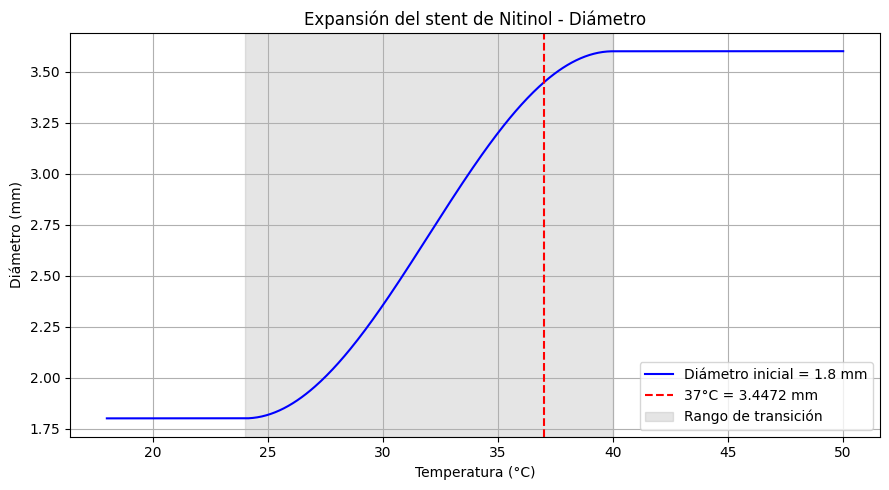

In [3]:
# Llamada a la función para el diámetro
expansion(tipo="diámetro", T_min=18, T_max=50, D_inicial=1.8, As=24.00, Af=40.00, alpha_m=6.6e-6, alpha_a=11e-6)

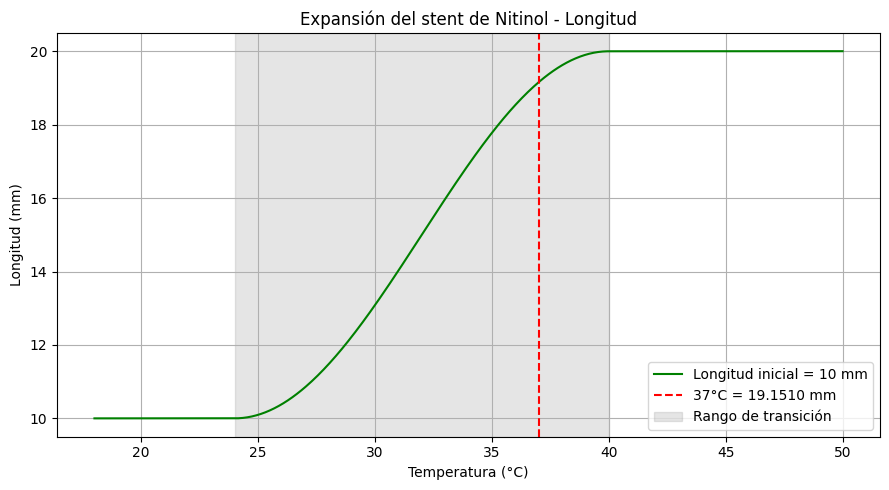

In [4]:
# Llamada a la función para la longitud
expansion(tipo="longitud", T_min=18, T_max=50, D_inicial=10, As=24.00, Af=40.00, alpha_m=6.6e-6, alpha_a=11e-6)


## Evaluación del Flujo Sanguíneo en el Stent

### Objetivo
El objetivo es analizar cómo varía el flujo sanguíneo a través del stent en diferentes condiciones fisiológicas (reposo y actividad), utilizando el modelo de Poiseuille para flujo laminar en un tubo cilíndrico. Se calculan variables como la caída de presión, velocidad promedio, velocidad máxima y perfil de velocidades a lo largo del radio del stent.

---

### Fundamento Teórico

#### Flujo Laminar de Poiseuille
El flujo de Poiseuille describe el comportamiento del líquido viscoso en una tubería cilíndrica bajo condiciones de flujo laminar. Es aplicable en vasos sanguíneos y stents cuando el flujo no es turbulento. La ecuación que rige este flujo es:

$$
Q = \frac{\pi \cdot R^4 \cdot \Delta P}{8 \cdot \mu \cdot L}
$$

Donde:

- \( Q \): Caudal o flujo volumétrico (m³/s)  
- \( R \): Radio del tubo (m)  
- \( $\Delta$ P \): Caída de presión (Pa)  
- \( $\mu$ \): Viscosidad dinámica de la sangre (Pa·s)  
- \( L \): Longitud del tubo o stent (m)

A partir de esta ecuación, se puede aislar la caída de presión como:

$$
\Delta P = \frac{8 \cdot \mu \cdot L \cdot Q}{\pi \cdot R^4}
$$

---

### Perfil de Velocidad

La distribución de velocidades dentro del stent sigue un perfil parabólico:

$$
v(r) = v_{\text{max}} \cdot \left(1 - \frac{r^2}{R^2} \right)
$$

Donde:

- \( v(r) \): Velocidad en un punto del radio \( r \)  
- \( v_${\text{max}}$ \): Velocidad máxima en el centro (r = 0)  
- \( R \): Radio del stent  
- \( r \): Distancia desde el centro del stent

La **velocidad promedio** se relaciona con la máxima como:

$$
v_{\text{prom}} = \frac{v_{\text{max}}}{2}
$$

---

### Condiciones Analizadas

Se ha considerado que el stent va a ser implantado en arterias coronarias.

#### 1. En Reposo 
- **Flujo coronario típico**: 200ml/min 
- **Caudal total**:  
  $$
    Q = \frac{200 \, \text{ml}}{1 \, \text{min}} \times \frac{1 \times 10^{-6} \, \text{m}^3}{1 \, \text{ml}} \times \frac{1 \, \text{min}}{60 \, \text{s}} = \frac{200 \times 10^{-6}}{60} \, \text{m}^3/\text{s} = 3.33 \times 10^{-6} \, \text{m}^3/\text{s}
$$
- Se espera una velocidad promedio baja y una caída de presión menor.  
- El perfil de velocidades muestra un flujo más lento y uniforme.

#### 2. En Actividad
- **Flujo coronario típico**:1000ml/min  
- **Caudal total**:  
  $$
    Q = \frac{1000 \, \text{ml}}{1 \, \text{min}} \times \frac{1 \times 10^{-6} \, \text{m}^3}{1 \, \text{ml}} \times \frac{1 \, \text{min}}{60 \, \text{s}} = \frac{1000 \times 10^{-6}}{60} \, \text{m}^3/\text{s} = 16.67 \times 10^{-6} \, \text{m}^3/\text{s}
    $$ 
- Se espera una mayor velocidad promedio y una caída de presión más pronunciada.  
- El perfil de velocidades se ensancha y la velocidad máxima aumenta considerablemente.

---

### Cálculo de FFR e iFR

#### Índice de Reserva Fraccional (FFR) o Índice de Reserva Instantánea (iFR)

El **FFR** se utiliza para medir la caída de presión a través de una arteria coronaria en relación con la presión a nivel de la entrada (presión sistólica). El FFR se calcula como la relación entre la presión distal (presión después del stent) y la presión proximal (presión de entrada).

El **iFR** es un índice similar al FFR, pero se mide a través de la **presión en reposo** en lugar de durante la vasodilatación inducida por medicamentos. El iFR se calcula de la **misma manera** que el FFR.

$$
FFR = \frac{P_{\text{salida}}}{P_{\text{entrada}}}
$$

Donde:
- \( P_${\text{salida}}$ \) es la presión en el extremo distal del stent (después del flujo sanguíneo).
- \( P_${\text{entrada}}$ \) es la presión proximal, es decir, la presión antes del stent.

Un valor de **FFR o iFR cercano a 1** indica que no hay estenosis significativa, mientras que un valor **menor de 0.80** puede indicar que el stent no está permitiendo el flujo adecuado debido a la obstrucción.

La diferencia clave es que el iFR se mide sin la necesidad de usar vasodilatadores, por lo que es menos invasivo y más rápido en su medición.

---

### Visualización de Resultados

En ambos casos se genera un gráfico que representa:

- El **perfil de velocidades** a través del radio del stent.
- Se marca:
  - La **velocidad máxima** en el centro (en rojo).
  - La **velocidad cero** en la pared (en verde).
- El eje Y está invertido para que el centro del stent se muestre arriba, imitando un corte transversal desde dentro hacia fuera.

---

### Conclusiones

1. **Caída de presión**: La caída de presión depende directamente del flujo. Al aumentar el flujo (actividad), la resistencia del stent genera una mayor caída de presión.
2. **Perfil de velocidades**: El perfil de velocidades cambia notablemente entre reposo y actividad. En reposo, el flujo es más lento y más uniforme, mientras que en actividad, el flujo se acelera, y la velocidad máxima aumenta significativamente.
3. **Velocidades máximas y mínimas**: El flujo siempre es cero en las paredes del stent y máximo en el centro, como lo indica el perfil parabólico de Poiseuille.
4. **Adaptación de la circulación**: El sistema circulatorio se adapta al esfuerzo físico, aumentando el flujo a través de los vasos, lo que se refleja en la variación de la caída de presión y la velocidad máxima.
5. **FFR e iFR**: Estos índices permiten evaluar la funcionalidad del stent en diferentes condiciones.



In [5]:
# Función para calcular el flujo sanguíneo
def flujo(Q, R_stent, L, mu, P_entrada):
    delta_P = (8 * mu * L * Q) / (np.pi * R_stent**4)  # Caída de presión
    v_prom = Q / (np.pi * R_stent**2)  # Velocidad promedio 
    P_salida = P_entrada - delta_P  # Presión en salida

    # Perfil de velocidades
    total_points = 100
    r = np.linspace(0, R_stent, total_points)
    v = (1 / (4 * mu)) * (-delta_P / L) * (R_stent**2 - r**2)
    v = np.abs(v)  # Asegurar valores positivos

    # Calcular velocidad máxima en el centro
    v_max = np.max(v)

    #Cálcular FFR o iFR
    ffr= P_salida/P_entrada
    plt.figure(figsize=(10, 6))

    # Perfil de velocidad
    plt.plot(v, r * 1000, label='Perfil de velocidad', color='blue')  # r en mm
    
    # Marcar velocidad máxima en el centro
    plt.scatter([v_max], [0], color='red', zorder=5, label="Velocidad máxima (centro)")
    plt.text(v_max + 0.005, 0, f"Max: {v_max:.5f} m/s", color='red')
    
    # Marcar velocidad cero en el borde
    plt.scatter([0], [R_stent * 1000], color='green', zorder=5, label="Velocidad en la pared (borde)")
    plt.text(0.005, R_stent * 1000 + 0.5, "V_borde: 0 m/s", color='green')
    
    # Configurar el gráfico
    plt.xlabel('Velocidad (m/s)')
    plt.ylabel('Radio (mm)')
    
    plt.title('Perfil de Velocidad de Poiseuille en el Stent')
    plt.legend()
    plt.grid(True)
    plt.gca().invert_yaxis()  # Invertir eje Y para que el centro esté arriba
    plt.show()
    return delta_P, v_prom, P_salida, v, r, v_max,ffr 

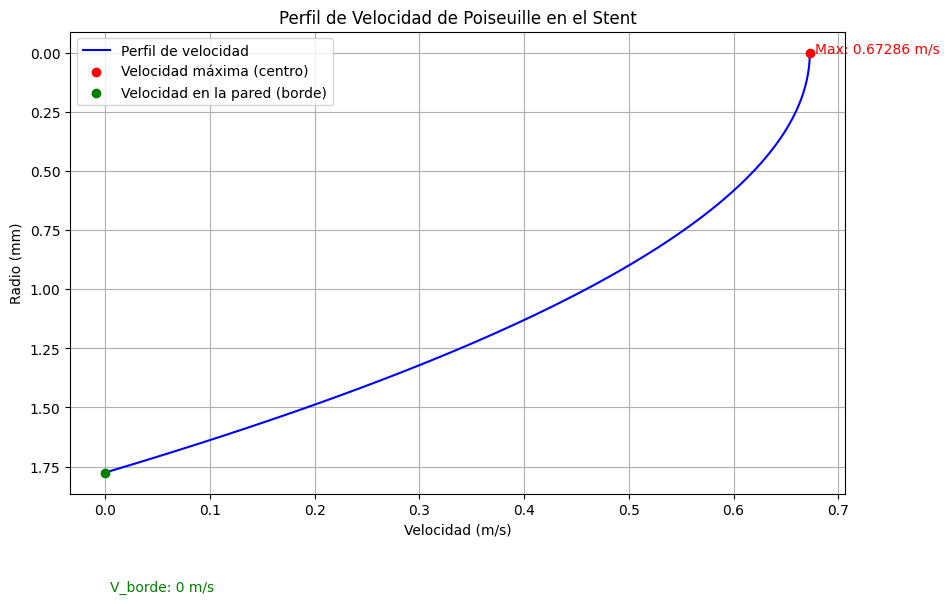

Caída de presión a través del stent: 5.98 Pa
Velocidad promedio del flujo sanguíneo en el stent: 0.33643 m/s
Presión en la salida del stent: 13326.02 Pa
FFR 1.00. Al ser > 0.8, el stent funcionando correctamente 


In [6]:
# Llamada a la función para el reposo
mu = 3.5e-3  # Viscosidad de la sangre (Pa·s)
L = 0.0020  # Longitud del stent (m)
Q = 3.33e-6  # Flujo sanguíneo (m^3/s)
R_stent = 1.775e-3  # Radio del stent (m)
P_entrada = 13332 
delta_P,v_prom,P_salida,v,r,v_max,ffr = flujo(Q, R_stent, L, mu, P_entrada)
print(f"Caída de presión a través del stent: {delta_P:.2f} Pa")
print(f"Velocidad promedio del flujo sanguíneo en el stent: {v_prom:.5f} m/s")
print(f"Presión en la salida del stent: {P_salida:.2f} Pa")
print(f"FFR {ffr:.2f}. Al ser > 0.8, el stent funcionando correctamente ")

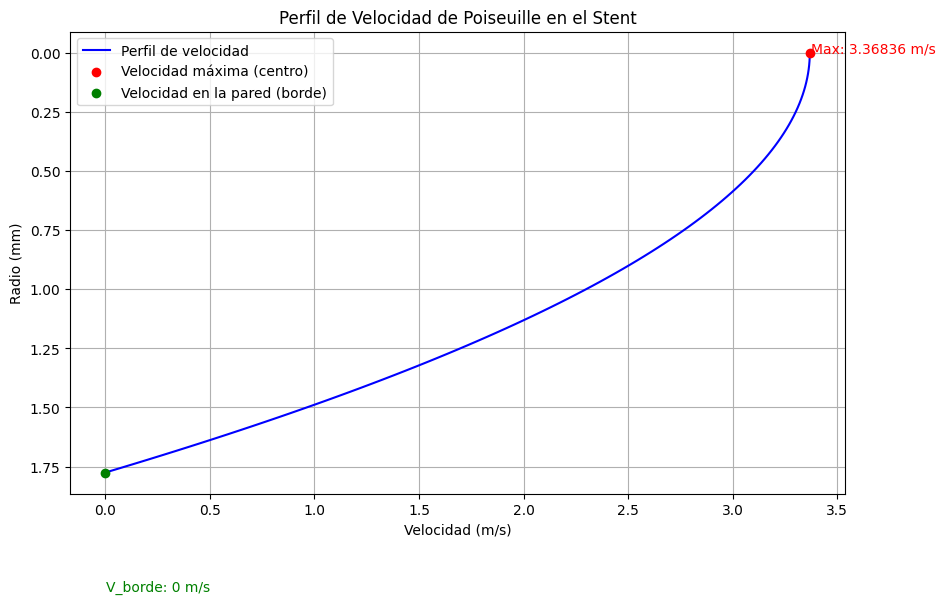

Caída de presión a través del stent: 299.35 Pa
Velocidad promedio del flujo sanguíneo en el stent: 1.68418 m/s
Presión en la salida del stent: 13032.65 Pa
FFR 0.98. Al ser > 0.8, el stent funcionando correctamente 


In [7]:
# Llamada a la función para la actividad
mu = 3.5e-3  # Viscosidad de la sangre (Pa·s)
L = 0.020  # Longitud del stent (m)
Q = 16.67e-6# Flujo sanguíneo (m^3/s)
R_stent = 1.775e-3  # Radio del stent (m)
P_entrada = 13332 
delta_P,v_prom,P_salida,v,r,v_max,ffr = flujo(Q, R_stent, L, mu, P_entrada)
print(f"Caída de presión a través del stent: {delta_P:.2f} Pa")
print(f"Velocidad promedio del flujo sanguíneo en el stent: {v_prom:.5f} m/s")
print(f"Presión en la salida del stent: {P_salida:.2f} Pa")
print(f"FFR {ffr:.2f}. Al ser > 0.8, el stent funcionando correctamente ")

#### Evaluación de la estenosis en el stent

In [8]:
def evaluar_estenosis(Q_reposo, Q_actividad, R_stent_original, L, mu, P_entrada):
    reducciones = [1.0, 0.75, 0.50, 0.3]  # 100%, 75%, 50% del radio original
    colores = ['blue', 'orange', 'red',"purple"]
    etiquetas = ['Sin oculusión ', '25% de oclusión', '50% de oclusión',"75% de oclusión"]
    
    estados = [('Reposo', Q_reposo), ('Actividad', Q_actividad)]
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    
    for idx, (estado, Q) in enumerate(estados):
        ax = axs[idx]
        for i, factor in enumerate(reducciones):
            R = R_stent_original * factor
            delta_P = (8 * mu * L * Q) / (np.pi * R**4)
            v_prom = Q / (np.pi * R**2)
            P_salida = P_entrada - delta_P
            ffr = max(P_salida / P_entrada, 0)

            total_points = 100
            r = np.linspace(0, R, total_points)
            v = (1 / (4 * mu)) * (-delta_P / L) * (R**2 - r**2)
            v = np.abs(v)

            ax.plot(v, r * 1000, color=colores[i], label=f"{etiquetas[i]} - FFR: {ffr:.2f}")

        ax.set_title(f"{estado}")
        ax.set_xlabel('Velocidad (m/s)')
        ax.grid(True)
        ax.legend()
        ax.invert_yaxis()

    axs[0].set_ylabel('Radio (mm)')
    fig.suptitle('Impacto de la Estenosis en el Perfil de Velocidad y FFR o iFR (Reposo vs Actividad)', fontsize=14)
    plt.tight_layout()
    plt.show()



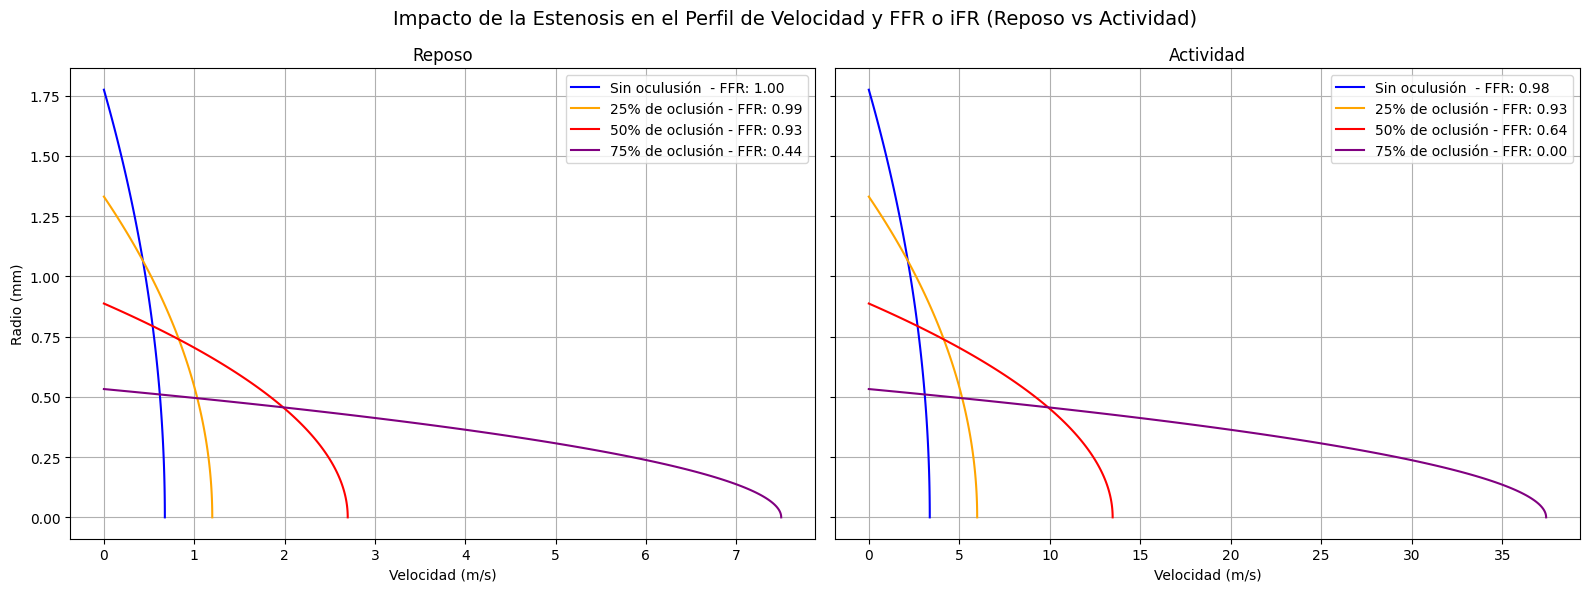

In [9]:
mu = 3.5e-3  # Viscosidad de la sangre (Pa·s)
L = 0.020  # Longitud del stent (m)
Q_rep = 3.34e-6 # Flujo sanguíneo rep (m^3/s)
Q_act = 16.67e-6# Flujo sanguíneo act (m^3/s)
R_stent = 1.775e-3  # Radio del stent (m)
P_entrada = 13332 # Pa (~ mmHg)

# Ejecutar la simulación
evaluar_estenosis(Q_rep,Q_act, R_stent, L, mu, P_entrada)

## Análisis Eléctrico del Circuito LC

### Objetivo

Este análisis se presenta los fundamentos teóricos y cálculos necesarios para evaluar la viabilidad del sistema de comunicación del *stent* inteligente, basado en un circuito resonante LC.

Se calcularán los siguientes parámetros clave:

- **Inductancia** de las bobinas integradas en el *stent*.
- **Capacitancia** del sensor, la cual dependerá de la distancia entre los electrodos.
- **Frecuencia de resonancia** del sistema.
- **Factor de calidad (Q)** del circuito.
- **Distancia máxima de comunicación externa** mediante acoplamiento inductivo.

---


### 1. Cálculo de la *Inductancia* de las Bobinas del Stent Inteligente
Para calcular la inductancia *L* de las bobinas del stent, utilizamos la siguiente fórmula empírica:

$$
L (\mu H) = \frac{(r ^ 2) \cdot (N ^ 2)}{(9 \cdot r) + (10 \cdot l)}
$$

Donde:
- \( r \) es el radio de la bobina en *cm*.
- \( l \) es la longitud de la bobina en *cm*.
- \( N \) es el número de vueltas de la bobina.

El resultado de la fórmula se obtiene en *microhenrios (µH)*, por lo que se convierte a **Henrios (H)** multiplicando por \( 1e-6 \).

---- 
En este caso, el stent inteligente esta formado por dos bobinas internas conectadas en paralelo, por lo que la inductancia total \( L_{\text{total}} \) se calcula con la fórmula para inductancias en paralelo:

$$
\frac{1}{L_{\text{total}}} = \frac{1}{L_1} + \frac{1}{L_2}
$$



In [10]:
# Función para calcular inductancia de una bobina
def calcular_inductancia(r_cm, l_cm, N):
    L_uH = (r_cm**2 * N**2) / (9 * r_cm + 10 * l_cm)
    return L_uH * 1e-6  # Convertir a Henrios

In [11]:
# Datos de las bobinas del stent
r_bobina_stent = 0.06  # cm
l_bobina_stent = 0.25  # cm
vueltas_bobina_stent = 10

# Calcular inductancia de las bobinas del stent
L_bobina_stent = calcular_inductancia(r_bobina_stent, l_bobina_stent, vueltas_bobina_stent)
print(f"Inductancia de cada bobina del stent: {L_bobina_stent*1e6:.2f} µH")

#Cálculo de la inductancia total
L_total = 1 / (1/L_bobina_stent + 1/L_bobina_stent) 
print(f"Inductancia total del circuito LC: {L_total*1e6:.2f} µH")

Inductancia de cada bobina del stent: 0.12 µH
Inductancia total del circuito LC: 0.06 µH


### 2. Cálculo de la Capacitancia Total del Sensor

La capacitancia de los sensores capacitivos del stent se calcula usando la siguiente fórmula :

$$
C = \frac{\epsilon_0 \cdot \epsilon_r \cdot A}{d}
$$

Donde:
- \( $\epsilon_0$ = 8.854 $\times 10^{-12}$ \, $\text{F/m}$ \) es la permitividad del vacío.
- \( $\epsilon_r$ \) es la permitividad relativa del material (en este caso, poliamida).
- \( A \) es el área de los electrodos en m².
- \( d \) es el grosor de la capa de material (en este caso, poliamida) en m.

In [12]:
def calcular_capacitancia(A_electrodo_m2, d_poliamida_m, num_pares_electrodos):
    epsilon_0 = 8.854e-12  # F/m (permitividad del vacío)
    epsilon_r_poliamida = 3.2  # Permitividad relativa de la poliamida
    C_par = epsilon_0 * epsilon_r_poliamida * A_electrodo_m2 / d_poliamida_m
    return num_pares_electrodos * C_par * 2

In [13]:
# Datos de los electrodos y recubrimiento de poliamida
A_electrodo_m2 = 1.05e-7  # Área de los electrodos en m^2 
d_poliamida_m = 5e-6  # Grosor de la capa de poliamida en metros 

# Número de pares de electrodos
num_pares_electrodos = 48

# Calcular capacitancia de un par de electrodos
C_total = calcular_capacitancia(A_electrodo_m2, d_poliamida_m, num_pares_electrodos)

print(f"Capacitancia total del sensor con 48 pares de electrodos: {C_total*1e12:.2f} pF")

Capacitancia total del sensor con 48 pares de electrodos: 57.12 pF


### 3. Cálculo de la Frecuencia de Resonancia

La frecuencia de resonancia de un circuito LC se calcula usando la fórmula:

$$
f_0 = \frac{1}{2 \pi \sqrt{L \cdot C}}
$$

Donde:
- \( L \) es la inductancia total en Henrios (H).
- \( C \) es la capacitancia total en Faradios (F).

In [14]:
def calcular_frecuencia_resonancia(L, C):
    return 1 / (2 * np.pi * np.sqrt(L * C))

In [15]:
f_resonancia = calcular_frecuencia_resonancia(L_total, C_total)
print(f"Frecuencia de resonacia del stent: {f_resonancia/1e6:.2f} MHz")

Frecuencia de resonacia del stent: 86.54 MHz


#### Relación entre Capacitancia y Frecuencia

In [16]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Parámetros fijos
A_electrodo_m2 = 1.05e-7
epsilon_0 = 8.854e-12
epsilon_r_poliamida = 3.2
num_pares_electrodos = 48

# Rango de distancia entre electrodos (3 µm a 10 µm)
d_poliamida_range = np.linspace(3e-6, 1e-5, 100)

# Cálculo de capacitancia total y frecuencia de resonancia
C_total_array = 2 * num_pares_electrodos * epsilon_0 * epsilon_r_poliamida * A_electrodo_m2 / d_poliamida_range
f_resonancia_array = 1 / (2 * np.pi * np.sqrt(L_total * C_total_array))
f_resonancia_MHz_array = f_resonancia_array / 1e6

# Crear figura con subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=(
    "Frecuencia vs Distancia entre electrodos",
    "Frecuencia vs Capacitancia total"
))

# Primer gráfico: Frecuencia vs Distancia
fig.add_trace(
    go.Scatter(
        x=d_poliamida_range * 1e6,
        y=f_resonancia_MHz_array,
        mode='lines',
        name='f vs distancia',
        line=dict(color='blue')
    ),
    row=1, col=1
)

# Segundo gráfico: Frecuencia vs Capacitancia
fig.add_trace(
    go.Scatter(
        x=C_total_array * 1e12,
        y=f_resonancia_MHz_array,
        mode='lines',
        name='f vs capacitancia',
        line=dict(color='green')
    ),
    row=1, col=2
)

# Configuración de ejes y diseño
fig.update_xaxes(
    title_text="Distancia (µm)", 
    autorange="reversed", 
    row=1, col=1,
    showgrid=True,
    gridcolor='rgba(0, 0, 0, 0.1)',  # Color de la malla
    zeroline=False,
    showline=True,
    linewidth=2,  # Grosor de la línea del eje
    linecolor='black'  # Color oscuro para el eje
)
fig.update_yaxes(
    title_text="Frecuencia (MHz)", 
    row=1, col=1,
    showgrid=True,
    gridcolor='rgba(0, 0, 0, 0.1)',  # Color de la malla
    zeroline=False,
    showline=True,
    linewidth=2,  # Grosor de la línea del eje
    linecolor='black'  # Color oscuro para el eje
)

fig.update_xaxes(
    title_text="Capacitancia (pF)", 
    row=1, col=2,
    showgrid=True,
    gridcolor='rgba(0, 0, 0, 0.1)',  # Color de la malla
    zeroline=False,
    showline=True,
    linewidth=2,  # Grosor de la línea del eje
    linecolor='black'  # Color oscuro para el eje
)
fig.update_yaxes(
    title_text="Frecuencia (MHz)", 
    row=1, col=2,
    showgrid=True,
    gridcolor='rgba(0, 0, 0, 0.1)',  # Color de la malla
    zeroline=False,
    showline=True,
    linewidth=2,  # Grosor de la línea del eje
    linecolor='black'  # Color oscuro para el eje
)

fig.update_layout(
    title="Relaciones entre frecuencia de resonancia, distancia y capacitancia",
    showlegend=False,
    template='plotly_white',
    plot_bgcolor='white',  # Fondo blanco para el gráfico
    paper_bgcolor='white',  # Fondo blanco fuera del gráfico
)

fig.show()


## Cálculo del Factor de Calidad (Q) del Circuito LC

Para evaluar la eficiencia del sistema de comunicación por acoplamiento inductivo, se calcula el **factor de calidad** $Q$ del circuito LC, que indica cuán selectivo y eficiente es el sistema a su frecuencia de resonancia. Este parámetro es clave en sistemas implantables, ya que determina cuánto se atenúa la señal y qué tan precisa es la detección en la frecuencia deseada.

### Fórmulas utilizadas

1. **Resistencia del hilo conductor (oro):**

$$
R = \rho \cdot \frac{l}{A}
$$

donde:
- $\rho$ es la resistividad del oro ($2.44 \times 10^{-8} \ \Omega \cdot \text{m}$)
- $l$ es la longitud del hilo
- $A$ es el área de la sección transversal del hilo

2. **Factor de calidad del circuito LC:**

$$
Q = \frac{1}{R} \cdot \sqrt{\frac{L}{C}}
$$

donde:
- $L$ es la inductancia en Henrios
- $C$ es la capacitancia en Faradios
- $R$ es la resistencia de la bobina


In [17]:
import math

# Parámetros del sistema
rho_oro = 2.44e-8  # Resistividad del oro en ohm·m
radio_bobina_m = 0.0006  # 0.03 cm
vueltas = 10
longitud_hilo = 2 * math.pi * radio_bobina_m * vueltas  # Longitud total del hilo
diametro_hilo = 5e-6  # 5 µm
area_seccion = math.pi * (diametro_hilo / 2)**2

# Calcular resistencia del hilo
R = rho_oro * longitud_hilo / area_seccion
R_total = 1 / (1/R + 1/R)

# Calcular factor de calidad Q
Q = (1 / R_total) * math.sqrt(L_total / C_total)

# Mostrar resultados
print(f"Resistencia estimada del hilo de oro: {R_total:.3f} ohmios")
print(f"Factor de calidad (Q) del circuito LC: {Q:.2f}")

Resistencia estimada del hilo de oro: 23.424 ohmios
Factor de calidad (Q) del circuito LC: 1.37


## Cálculo de la distancia máxima 

Se calcula la distancia máxima permisible entre  transmisora y una bobina receptora en un sistema de acoplamiento inductivo. Este cálculo se basa en el radio de la bobina transmisora, los factores de calidad de ambas bobinas y el coeficiente de acoplamiento efectivo.

La distancia máxima `d_max` entre las bobinas se estima con la siguiente expresión aproximada:

$$
d_{\text{max}} = r_t \cdot \sqrt{\frac{Q_t \cdot Q_r}{k_{\text{eff}}}}
$$


Esta fórmula **no proviene de una ley física exacta**, sino que es una **aproximación comúnmente utilizada** en el diseño de sistemas de transferencia inalámbrica de energía como el acoplamiento inductivo.

In [18]:

# Inductancia externa
L_externa = 4e-6 # Henrios 
#Resistencia externa
R_externa = 25 #Ohmnios
# Capacitancia para resonancia
C_externa = 1 / ((2 * math.pi * f_resonancia)**2 * L_externa)

Q_externa = (1 / R_externa) *  math.sqrt(L_externa / C_externa)
# Fórmula para calcular la distancia máxima de comunicación usando el criterio empírico
# Parámetros adicionales
k_eff = 0.8  # Eficiencia de acoplamiento (ajustable)

r_t =0.035  # Radio de la bobina emisora (en metros)

# Cálculo de la distancia máxima de comunicación
d_max = r_t * k_eff * math.sqrt(Q_externa * Q)


print(f"Distancia máxima de comunicación estimada: {d_max:.3f} metros")

Distancia máxima de comunicación estimada: 0.306 metros


## Evaluación mécanica del stent

## 🔧 Análisis Mecánico de un Stent de Nitinol

Esta sección describe el análisis mecánico de un **stent fabricado con Nitinol**, un material con memoria de forma que varía sus propiedades mecánicas en función de la temperatura. Se estudia su comportamiento estructural ante presión interna, en condiciones de **reposo** y **actividad**, para verificar si el diseño cumple con los criterios de seguridad mecánica.

---

### 1. Parámetros del Modelo

El stent se modela como un **cilindro de pared delgada**, sometido a una presión interna uniforme.

**Parámetros geométricos y de carga:**

- **Presión interna aplicada:**
  - En actividad: `13272.02 Pa`
  - En reposo: `13032.65 Pa`
- **Radio interno del stent:**  
  $ r_i = 1.67 \times 10^{-3} \ \text{m} $
- **Radio externo del stent:**  
  $ r_o = 1.78 \times 10^{-3} \ \text{m} $
- **Espesor de la pared:**  
  $ e = r_o - r_i = 0.11 \times 10^{-3} \ \text{m} $

> Dado que el espesor es mucho menor que el radio ($e<0.1⋅ r_i$), se aplica la teoría de **cilindros delgados**.

---

### 2. Cálculo de Tensiones

Cuando un cilindro delgado está sometido a presión interna, las tensiones principales que se desarrollan son:



#### 2.1 Tensión Circunferencial (Hoop Stress) — $\sigma_\theta$

**Definición:**  
Es la tensión tangencial que actúa alrededor de la circunferencia del stent. Es la más crítica en este tipo de geometría.

**Fórmula (para cilindros delgados):**

$$
\sigma_\theta = \frac{p \cdot r_i}{e}
$$

Donde:
- \( p \): presión interna,
- \( r_i \): radio interno,
- \( e \): espesor de la pared.

> Esta tensión es **máxima** y suele ser la que controla el diseño.

---

#### 2.2 Tensión Radial — $\sigma_r$

En un cilindro de pared delgada, la tensión radial es mucho menor que la circunferencial, y se **desprecia**:

$$
\sigma_r \approx 0
$$

---

#### 2.3 Tensión Axial — $\sigma_z$

En este caso, el stent está **abierto por los extremos**, por lo que no hay presión axial significativa:

$$
\sigma_z = 0
$$

---

#### 2.4 Tensión de Von Mises — $\sigma_{vm}$

**Definición:**  
Se utiliza para comparar un estado de tensiones con el límite elástico del material.

**Fórmula (simplificada para $\sigma_r = \sigma_z = 0$):**

$$
\sigma_{vm} = \sigma_\theta
$$

> Como sólo hay una componente de tensión relevante, la tensión de Von Mises **coincide** con la tensión circunferencial.

---

### ✅ 3. Evaluación de Seguridad

Una vez calculado el esfuerzo de von Mises, se evalúa si el material está trabajando dentro de los límites seguros. Para ello se ha escogido un factor de seguridad de 2 ya que este asegura que el stent pueda soportar el doble de la carga máxima esperada antes de alcanzar el límite elástico del material. Esto proporciona un margen adicional de seguridad para cubrir incertidumbres en las cargas y variabilidad del material. Un FS de 2 equilibra la seguridad y eficiencia, evitando que el stent falle bajo condiciones imprevistas sin sobredimensionarlo. Este enfoque es común en aplicaciones críticas, como los stents, donde la fiabilidad es esencial para la seguridad del paciente.

**Condición de seguridad:**

$$
\sigma_{vm} < \frac{\sigma_{\text{límite}}}{FS}
$$

Donde:
- \( \sigma_{\text{límite}} \): límite elástico del Nitinol (ej. 500 MPa),
- \( FS = 2 \): factor de seguridad adoptado.

> Esto asegura que el stent no fallará ni siquiera ante condiciones inesperadas.

---

### 📊 4. Distribución de Tensiones

En la teoría de cilindros delgados, se **asume que las tensiones son constantes a lo largo del espesor**. Por lo tanto, no se espera variación radial significativa, y no es necesario representar una distribución compleja.

Si se cumple la sigueinte concidión ($e>= 0.1⋅ r_i$) se requiere un análisis más preciso (para un cilindro de pared gruesa), se utilizaría un modelo más complejo que considera variación de tensiones a lo largo del espesor, pero no en este caso no necesario para el diseño del stents.


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def tension(p, r_i, r_o, limite_elastico, FS, flag=True):
    # Geometría
    t = r_o - r_i  # espesor
    r_m = (r_i + r_o) / 2  # radio medio
    if 0.1>t/r_i:
        print("Uso de la teoria del cilindro delgado.")
        # Tensión circunferencial (teoría del cilindro delgado)
        sigma_theta = (p * r_m) / t

        # Tensión radial despreciada
        sigma_r = 0

        # Tensión de von Mises (sin tensión axial)
        sigma_vm = sigma_theta

        # Límite admisible
        limite_admisible = limite_elastico / FS

        # Evaluación de seguridad
        if sigma_vm < limite_elastico and sigma_vm < limite_admisible:
            print("✅ El diseño es MECÁNICAMENTE SEGURO (cilindro delgado).")
        else:
            print("❌ PELIGRO: El diseño supera el límite elástico o no cumple con el factor de seguridad.")

        # Visualización
        if flag:
            r_values = np.linspace(r_i, r_o, 200)
            sigma_theta_f = np.full_like(r_values, sigma_theta / 1e6)  # MPa
            sigma_vm_f = sigma_theta_f  # es igual
            sigma_r_f = np.zeros_like(r_values)

            r_mm = r_values * 1000  # mm

            plt.figure(figsize=(8, 5))
            plt.plot(r_mm, sigma_theta_f, label='Tensión circunferencial (MPa)', color='blue')
            plt.plot(r_mm, sigma_r_f, label='Tensión radial (MPa)', color='red')
            plt.plot(r_mm, sigma_vm_f, label='Tensión von Mises (MPa)', color='green')
            plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

            plt.title('Distribución de tensiones (modelo de cilindro delgado)')
            plt.xlabel('Radio desde el interior hacia el exterior (mm)')
            plt.ylabel('Tensión (MPa)')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    else:
        print("Uso de la teoria del cilindro grueso.")
        # Cálculo de tensiones (sin afectar por módulo de Young)
        sigma_theta = (p * r_i**2) / (r_o**2 - r_i**2)  # Tensión circunferencial
        sigma_r = -(p * r_i**2) / (r_o**2 - r_i**2)     # Tensión radial
        
        # Tensión de von Mises
        sigma_vm = np.sqrt(0.5 * ((sigma_theta - sigma_r)**2 + sigma_theta**2 + sigma_r**2))

        # Límite admisible
        limite_admisible = limite_elastico / FS

        if sigma_vm < limite_elastico and sigma_vm < limite_admisible:
            print("✅ El diseño es MECÁNICAMENTE SEGURO, cumple con el límite elástico y el factor de seguridad.")
        else:
            print("❌ PELIGRO: El diseño supera el límite elástico o no cumple con el factor de seguridad.")
        # Distribución radial para visualizar
        if flag:
            r_values = np.linspace(r_i, r_o, 200)
            
            # Cálculo de tensiones
            sigma_theta_f = (p * r_values**2) / (r_o**2 - r_i**2)    # Circunferencial (tracción)
            sigma_r_f = -(p * r_values**2) / (r_o**2 - r_i**2)        # Radial (compresión)
            sigma_vm_f = np.sqrt(0.5 * ((sigma_theta_f - sigma_r_f)**2 + sigma_theta_f**2 + sigma_r_f**2))  # von Mises
            
            # Conversión a MPa y mm para graficar
            sigma_theta_f /= 1e6
            sigma_r_f /= 1e6
            sigma_vm_f /= 1e6
            r_mm = r_values * 1000  # mm
            
            # Gráfica
            plt.figure(figsize=(8, 5))
            plt.plot(r_mm, sigma_theta_f, label='Tensión circunferencial (MPa)', color='blue')
            plt.plot(r_mm, sigma_r_f, label='Tensión radial (MPa)', color='red')
            plt.plot(r_mm, sigma_vm_f, label='Tensión von Mises (MPa)', color='green')
            plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
            
            plt.title('Distribución de tensiones a través del espesor del stent')
            plt.xlabel('Radio desde el interior hacia el exterior (mm)')
            plt.ylabel('Tensión (MPa)')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    return sigma_theta, sigma_r, sigma_vm, limite_admisible


**En actividad**

Uso de la teoria del cilindro delgado.
✅ El diseño es MECÁNICAMENTE SEGURO (cilindro delgado).


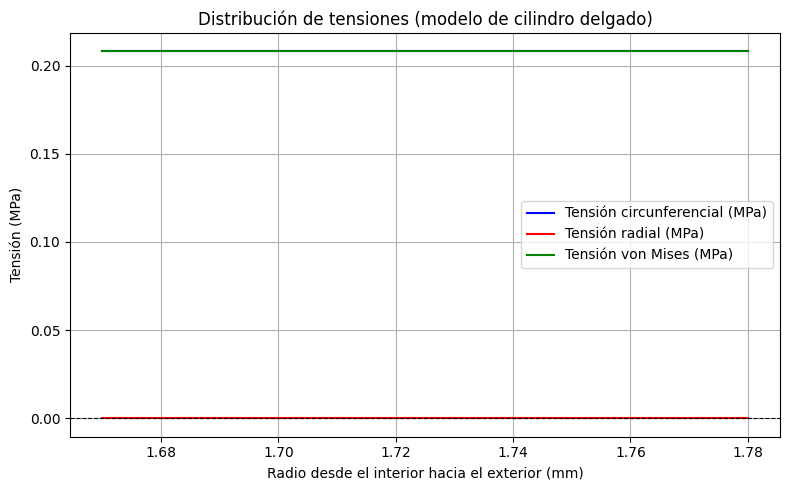

--- Análisis mecánico del stent ---
Tensión circunferencial: 0.208 MPa
Tensión radial: 0.000 MPa
Tensión de von Mises: 0.208 MPa
Límite máximo admisible: 250 MPa


In [ ]:
# Parámetros del stent
p = 13272.02  # Presión interna (Pa)
r_i = 1.67e-3  # Radio interno (m)
r_o = 1.78e-3  # Radio externo (m)
limite_elastico=500e6 #limite_elastico_austenita (Pa)
FS= 2
sigma_theta,sigma_r,sigma_vm,limite_admisible = tension(p,r_i,r_o, limite_elastico,FS)

# Resultados
print(f"--- Análisis mecánico del stent ---")
print(f"Tensión circunferencial: {sigma_theta/1e6:.3f} MPa")
print(f"Tensión radial: {sigma_r/1e6:.3f} MPa")
print(f"Tensión de von Mises: {sigma_vm/1e6:.3f} MPa")
print(f"Límite máximo admisible: {limite_admisible/1e6:.0f} MPa")

**En reposo**

Uso de la teoria del cilindro delgado.
✅ El diseño es MECÁNICAMENTE SEGURO (cilindro delgado).


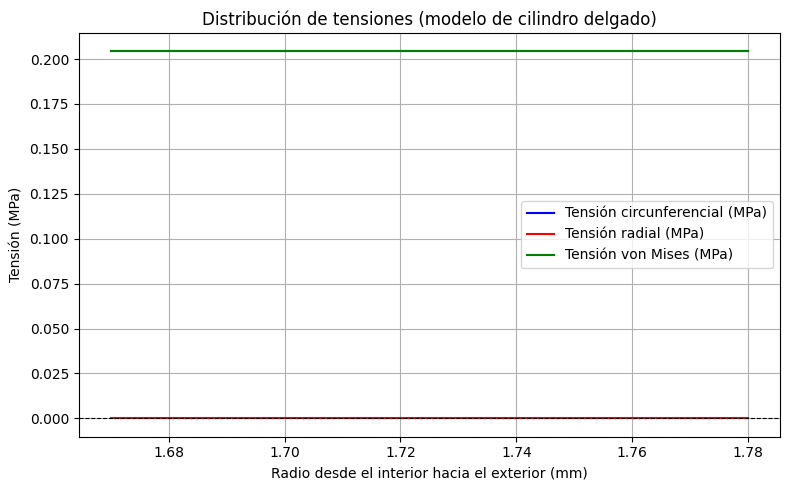

--- Análisis mecánico del stent ---
Tensión circunferencial: 0.204 MPa
Tensión radial: 0.000 MPa
Tensión de von Mises: 0.204 MPa
Límite máximo admisible: 250 MPa


In [27]:
# Parámetros del stent
p = 13032.65# Presión interna (Pa)
r_i = 1.67e-3  # Radio interno (m)
r_o = 1.78e-3  # Radio externo (m)
limite_elastico=500e6 #limite_elastico_austenita (Pa)
FS= 2
sigma_theta,sigma_r,sigma_vm,limite_admisible = tension(p,r_i,r_o, limite_elastico,FS)

# Resultados
print(f"--- Análisis mecánico del stent ---")
print(f"Tensión circunferencial: {sigma_theta/1e6:.3f} MPa")
print(f"Tensión radial: {sigma_r/1e6:.3f} MPa")
print(f"Tensión de von Mises: {sigma_vm/1e6:.3f} MPa")
print(f"Límite máximo admisible: {limite_admisible/1e6:.0f} MPa")